In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
import csv
filename ="products.csv"
f = open('filename.csv', 'w', encoding='utf-8') 
f.write("")
for i in range(1,520):
    req = Request('https://www.avito.ma/fr/maroc/ordinateurs_portables-%C3%A0_vendre?f=c&o='+str(i), headers={'User-Agent': 'Chrome/80.0.3987.149'})
    page_html = urlopen(req).read()
    page_soup = soup(page_html, "html.parser")
    containers = page_soup.findAll("div",{"class":"item li-hover"})
    for container in containers:
        brands = container.findAll("div",{"class":"item-info ctext1 mls float-right"})
        prices = container.findAll("span",{"dir":"ltr"})
        stores = container.findAll("a",{'href':'javascript:;'})  
        cities = container.findAll("div",{"class":'re-text'})
        if len(cities)==0:#31
  
            if len(brands)==0:
                if len(stores)==0 :
                    if len(prices)==0:
                        price = 'None'
                        print(price)
                        f.write(str(price) + "\n")
                    else:
                        price = prices[0].text
                        print("price:" , prices)
                        f.write(str(price) + "\n")
                else:
                    if len(prices)==0:
                        store = stores[0]['data-store'].split()[0]
                        f.write(str(store) + "\n")
                    else:
                        store = stores[0]['data-store'].split()[0]
                        price = prices[0].text
                        print("prices:" , price)
                        print("store name:", store)
                        f.write(str(price) + "," + str(store) + "\n")
                            
                        
                            
            else :#44
                if len(stores)==0 :
                        brand = brands[0].div.div.h2.text
                        price = prices[0].text
                        print("prices:" , price)
                        print("brands:" , brand)
                        f.write(str(brand) + "," + str(price) + "\n")
                else:
                    brand = brands[0].div.div.h2.text
                    store = stores[0]['data-store'].split()[0]
                    price = prices[0].text
                    print("prices:" , price)
                    print("store name:", store)
                    print("brands:" , brand)
                    f.write(str(brand) + "," + price + "," + str(store) + "\n")                  
        else :
            if len(brands)==0:
                if len(stores)==0 :
                    citie = cities[0].text.split()[0]
                    price = prices[0].text
                    print("prices:" , price)
                    print('cities:', citie)
                    f.write(price + ","  + str(citie) + "\n")
                else:
                    citie = cities[0].text.split()[0]
                    store = stores[0]['data-store'].split()[0]
                    price = prices[0].text
                    print("prices:" , price)
                    print("store name:", store)
                    print('cities:', citie)
                    f.write(price + "," + str(store)+ ","  + str(citie) + "\n")                            
            else :
                if len(stores)==0 :
                    citie = cities[0].text.split()[0]
                    brand = brands[0].div.div.h2.text
                    print("brands:" , brand)
                    print('cities:', citie)
                    if len(prices)==0:
                        price='None'
                        print("prices:" , price)
                    else:
                        price = prices[0].text
                        print("prices:" , price)
                    f.write(str(brand) + "," + price + ","  + str(citie) + "\n")
                else:
                    citie = cities[0].text.split()[0]
                    brand = brands[0].div.div.h2.text
                    store = stores[0]['data-store'].split()[0]
                    
                    print("store name:", store)
                    print("brands:" , brand)
                    if len(prices)==0:
                        price='None'
                        print("prices:" , price)
                    else:
                        price = prices[0].text
                        print("prices:" , price)
                    print('cities:', citie)
                    f.write(str(brand) + "," + str(price) +","  + str(store) + "," + str(citie) +  "\n")    
f.close()

store name: DYNA
brands:  MacBook Air 13 
prices: 3 400
cities: Tanger
store name: DYNA
brands:  Apple MacBook Pro 2019 i9 Neuf 
prices: 27 000
cities: Tanger
store name: DYNA
brands:  Macbook Pro 2015 15 i7 
prices: 8 400
cities: Tanger
store name: DYNA
brands:  Dell Latitude 5480 
prices: 3 600
cities: Tanger
store name: DYNA
brands:  Surface Pro 6 2019 
prices: 8 000
cities: Tanger
store name: DYNA
brands:  Surface book 
prices: 6 800
cities: Tanger
store name: DYNA
brands:  HP Spectre X360 i7 7Th 
prices: 6 400
cities: Tanger
store name: DYNA
brands:  HP Spectre 2018 x360 
prices: 9 600
cities: Tanger
store name: DYNA
brands:  Asus F756U Gamer GTX 
prices: 5 800
cities: Tanger
store name: DYNA
brands:  Macbook Pro 2018 15 NEW 
prices: 23 000
cities: Tanger
store name: DYNA
brands:  Lenovo ThinkPad T490 NeuF 
prices: 6 600
cities: Tanger
store name: DYNA
brands:  Macbook Pro 2016 Touchbar 
prices: 10 500
cities: Tanger
store name: DYNA
brands:  Macbook Air 2015 
prices: 4 400
cities

In [2]:
import pandas as pd 
df = pd.read_csv('filename.csv', delimiter=",")
df.columns=['brands', 'prices', 'stores','cities']
df

,brands,prices,stores,cities
0,Apple MacBook Pro 2019 i9 Neuf,27 000,DYNA,Tanger
1,Macbook Pro 2015 15 i7,8 400,DYNA,Tanger
2,Dell Latitude 5480,3 600,DYNA,Tanger
3,Surface Pro 6 2019,8 000,DYNA,Tanger
4,Surface book,6 800,DYNA,Tanger
...,...,...,...,...
16358,HP Prodisplay P202 le bon affichage,1 100,Computer,Skhirat
16359,Intel Xeon E5-1607 (Remis a Neuf),490,Stationdetravail,Casablanca
16360,HP Z24i Display offre limitée,1 890,Computer,Tan-Tan
16361,HP Z24i la rapidité et l'accessibilité,1 550,Computer,Temara


# Visualisation des prix des annonces 

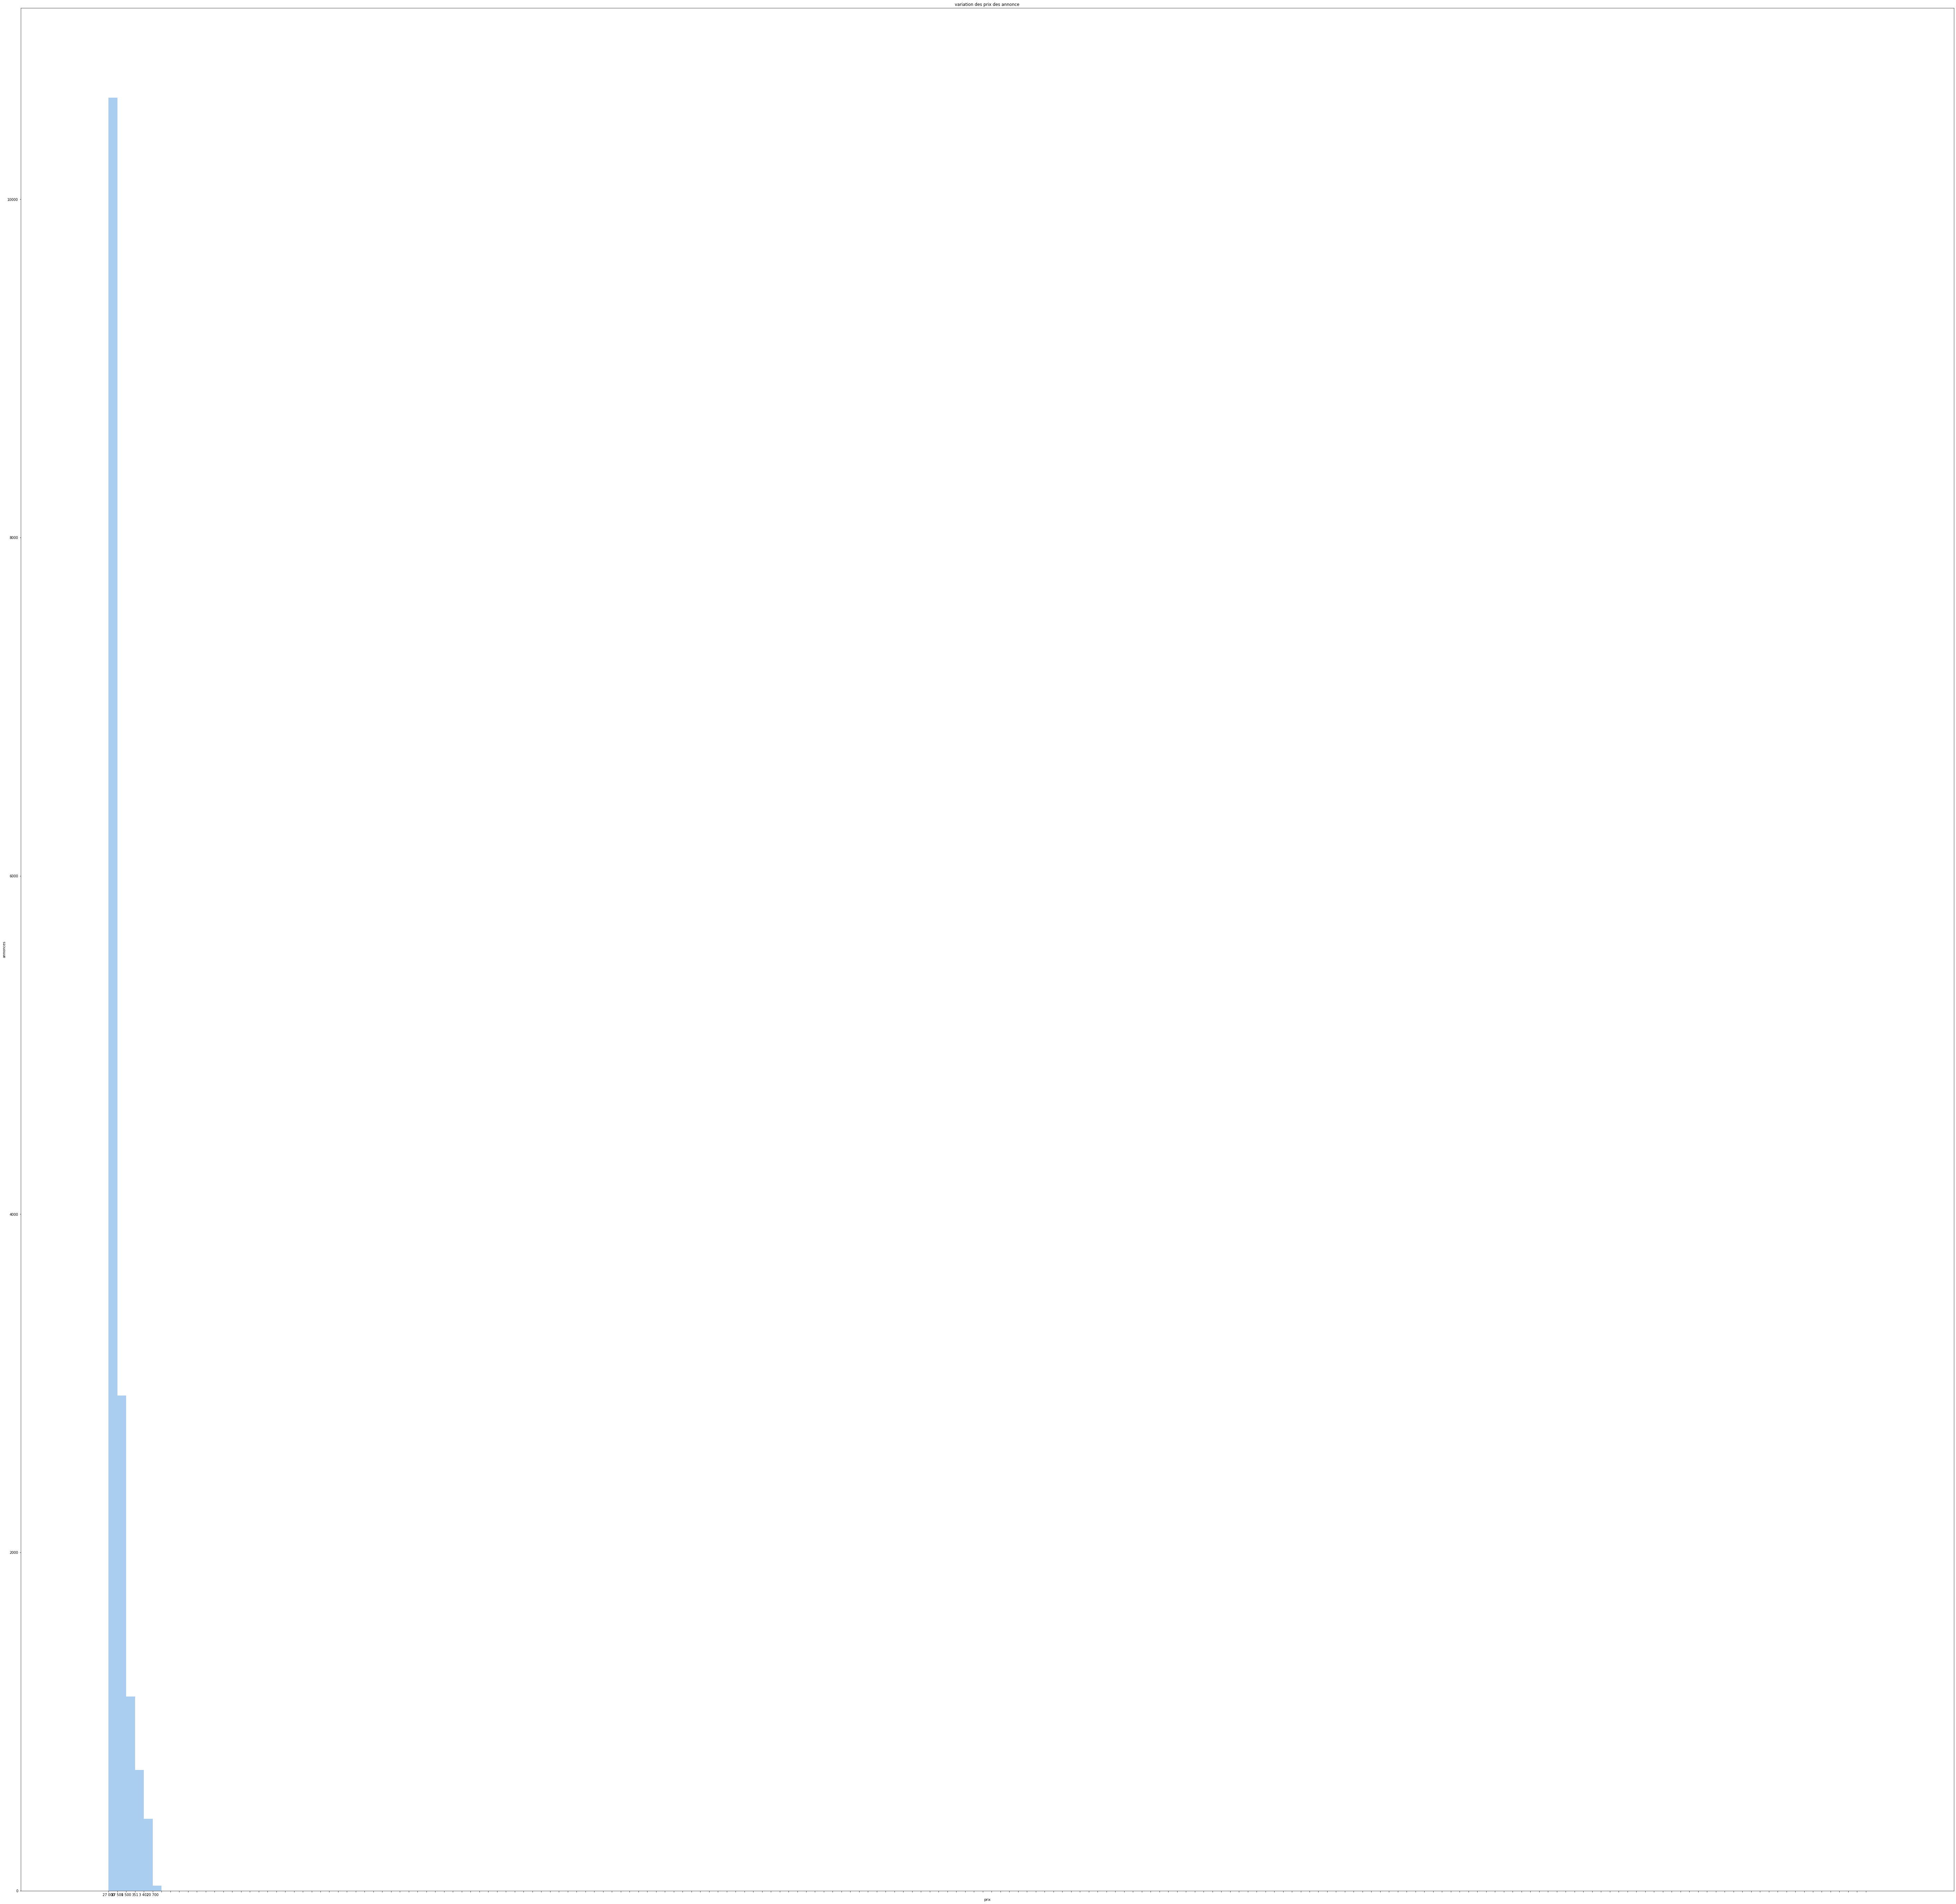

In [13]:

import numpy as np 
fig = plt.figure(figsize=(100,100))
df1=df.dropna()
plt.hist(df1.prices, bins=np.arange(0,20000,100), color='#abcdef')
bins=np.arange(0,20000,100)
plt.xticks(bins)
plt.ylabel('annonces')
plt.xlabel('prix')
plt.title('variation des prix des annonce')
plt.xticks(bins) 
plt.show()



# Nombe d'annonce par ville 


<Figure size 7200x4000 with 0 Axes>

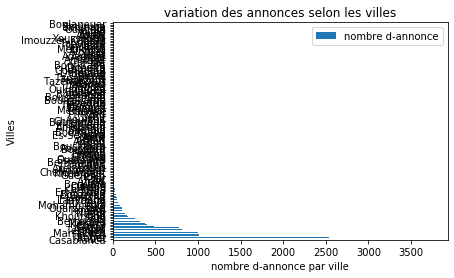

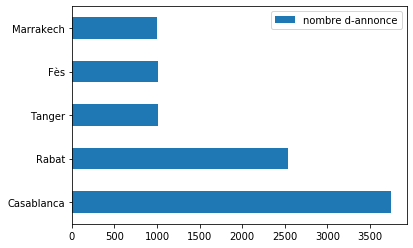

In [16]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(90, 50), dpi=80, facecolor='w', edgecolor='k')
cl=df1.cities.tolist() 
C=Counter(cl).most_common()
C1=pd.DataFrame(C)
C1.columns = ['cities', 'occurance']
citie = C1.cities.tolist()
occurance=C1.occurance.tolist()
data = pd.DataFrame({'nombre d-annonce' : occurance }, index=citie)
data.plot.barh(y='nombre d-annonce')
plt.ylabel('Villes')
plt.xlabel('nombre d-annonce par ville')
plt.title('variation des annonces selon les villes')
d1=data.head()   
d1.plot.barh(y='nombre d-annonce')

# Top 10 des magasins qui utilisent Avito

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


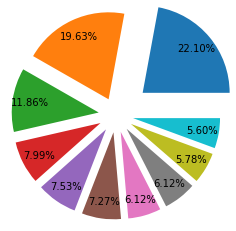

,nombre d-annonce
Nasiri,2497
Hinnovis,2218
Global,1340
MSDS,903
Pièce,851
Rendu,822
Stationdetravail,691
BEST,691
Multichoix,653
big,633


In [17]:
from collections import Counter
cl1=df1.stores.tolist() 
C1=Counter(cl1).most_common()
C2=pd.DataFrame(C1)
C2.columns = ['stores', 'occurance']
store = C2.stores.tolist()
occurance=C2.occurance.tolist()
data = pd.DataFrame({'nombre d-annonce' : occurance }, index=store)
data10=data.head(10) 
labels=data10.index.tolist()
plt.pie(data10, autopct = '%.2f%%' , pctdistance=0.8 , explode = (.4,.2,.2,.2,.2,.2,.2,.2,.2,.2))
plt.show()
data10